In [1]:
from scipy.cluster.hierarchy import leaves_list, is_valid_linkage

In [2]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [3]:
import re
import numpy as np
def newick_parser(newick_tree:str):
    linkage_matrix = []
    pattern = re.compile(r'\s+')
    newick_tree = re.sub(pattern, '', newick_tree)
    tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
    tokens = [token for token in tokens if token != '' and token != ';']
    count = 1
    for ind,token in enumerate(tokens):
        if token == "(" :
            linkage_matrix.append([])
        elif token ==',' and tokens[ind+1] == '(':
            continue
        elif token == ')':
            continue
        elif token == ':':
            continue
        else:
            x = tokens[ind-1]
            
            if x in ("(",","):
                token = float(token)
                last_link = linkage_matrix[len(linkage_matrix)-1]                
                linkage_matrix.insert(0,[token]) if len(last_link) >=2  else linkage_matrix[len(linkage_matrix)-1].append(token)
            elif x == ')':
                token = float(token)
                count+=1
                last_link = linkage_matrix[len(linkage_matrix)-count]
                linkage_matrix.append([token]) if len(last_link) >=2 else linkage_matrix[len(linkage_matrix)-count].append(token)                
    return np.flip(np.array(linkage_matrix))
            
            

In [4]:
def produce_linkage_matrix(newick_tree,distance_matrix):
    partial_linkage_matrix = newick_parser(newick_tree)
    dist_obs = np.array([[50 * (i),i+1] for i in range(len(partial_linkage_matrix))])
    return np.hstack((partial_linkage_matrix,dist_obs)).astype(float)
    

In [5]:
distances_1 = np.array([[0, 5, 9, 9, 8],
                      [5, 0, 10, 10, 9],
                      [9, 10, 0, 8, 7],
                      [9, 10, 8, 0, 3],
                      [8, 9, 7, 3, 0]])
indexes = list('abcde')

In [6]:
newick_string_tree_1 = '(3:2.000000, (2:4.000000, (1:3.000000, 0:2.000000)5:3.000000)6:2.000000, 4:1.000000)7'
newick_parser(newick_string_tree_1)
link_matrix_1 = produce_linkage_matrix(newick_string_tree_1,distances_1)

In [7]:
# Linkage matrix, ready to be used in POLO
link_matrix_1

array([[  0.,   1.,   0.,   1.],
       [  5.,   2.,  50.,   2.],
       [  6.,   3., 100.,   3.],
       [  7.,   4., 150.,   4.]])

In [8]:
# Prints the unordered leaves list of the phylogenetic tree
hierarchy.leaves_list(link_matrix_1)

array([0, 1, 2, 3, 4], dtype=int32)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 50.0, 50.0, 0.0],
  [50.0, 100.0, 100.0, 0.0],
  [100.0, 150.0, 150.0, 0.0]],
 'ivl': ['0', '1', '2', '3', '4'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['C1', 'C1', 'C1', 'C0']}

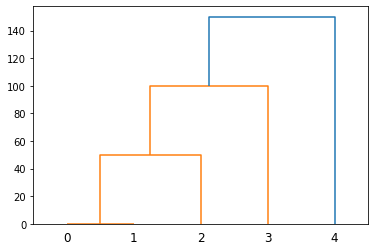

In [9]:
# Plots the dendogram based on the unordered leaves list
hierarchy.dendrogram(link_matrix_1)

### POLO -- Implementation
#### TODO :
1. Understand polo implementation and expand it for polytomous nodes

In [ ]:
# import re
# import numpy as np
# def newick_parser_1(newick_tree:str,distances):
#     leaves = [i for i in range(len(distances))]
#     linkage_matrix = []
#     pattern = re.compile(r'\s+')
#     newick_tree = re.sub(pattern, '', newick_tree)
#     tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
#     tokens = [token for token in tokens if token != '']
# #     print(tokens)
#     count = 1
#     fake_c = 1
#     for ind,token in enumerate(tokens):
#         if token == "(" :
#             linkage_matrix.append([])
#         elif token ==',' and tokens[ind+1] == '(':
#             continue
#         elif token ==',' and tokens[ind-3] == ')':
#             linkage_matrix.insert(0,[])
#         elif tokens[ind-1] == ',' and tokens[ind-4] ==')':
#             fake_c+=1
# #             print(linkage_matrix)
#             linkage_matrix[len(linkage_matrix)-fake_c].append(float(token))
#             fake_c-=1

#         elif token == ')':
#             fake_c+=1
#             new_leaf = len(leaves)
#             if len(linkage_matrix[len(linkage_matrix)-fake_c]) >=2:
#                 linkage_matrix.insert(0,[new_leaf])
#             else:    
#                 linkage_matrix[len(linkage_matrix)-fake_c].append(float(new_leaf))
#             leaves.append(new_leaf)
#         elif token == ':':
#             continue
#         else:
#             x = tokens[ind-1]
            
#             if x in ("(",","):
#                 token = float(token)
#                 linkage_matrix[len(linkage_matrix)-1].append(token)
#     return np.array(linkage_matrix)
            
            

In [124]:
import re
import numpy as np
def swapPositions(link, pos1, pos2): 
      
    link[pos1], link[pos2] = link[pos2], link[pos1] 
    return link

def newick_parser_1(newick_tree:str,distances):
    leaves = [i for i in range(len(distances))]
    linkage_matrix = []
    pattern = re.compile(r'\s+')
    newick_tree = re.sub(pattern, '', newick_tree)
    tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
    tokens = [token for token in tokens if token != '']
#     print(tokens)
    count = 1
    fake_c = 1
    for ind,token in enumerate(tokens):
        if token == "(" :
            linkage_matrix.append([])
        elif token ==',' and tokens[ind+1] == '(':
            continue
        elif token ==',' and tokens[ind-3] == ')':
            linkage_matrix.insert(0,[])
        elif tokens[ind-1] == ',' and tokens[ind-4] ==')':
            fake_c+=1
            linkage_matrix[len(linkage_matrix)-fake_c].append(float(token))
            fake_c-=1

        elif token == ')':
            fake_c+=1
            new_leaf = len(leaves)
            if len(linkage_matrix[len(linkage_matrix)-fake_c]) >=2:
                linkage_matrix.insert(0,[new_leaf])
            else:
                linkage_matrix[len(linkage_matrix)-fake_c].append(float(new_leaf))
                
            if len(linkage_matrix[len(linkage_matrix)-fake_c]) >=2:    
                linkage_matrix.append(linkage_matrix.pop(len(linkage_matrix)-fake_c))
    
            leaves.append(new_leaf)
        elif token == ':':
            continue
        else:
            x = tokens[ind-1]
            
            if x in ("(",","):
                token = float(token)
                linkage_matrix[len(linkage_matrix)-1].append(token)
    return np.array(linkage_matrix)
            
            

In [110]:
def produce_linkage_matrix(newick_tree,distance_matrix):
    partial_linkage_matrix = newick_parser_1(newick_tree,distance_matrix)
    dist_obs = np.array([[50 * (i+1),i+1] for i in range(len(partial_linkage_matrix))])
    return np.hstack((partial_linkage_matrix,dist_obs)).astype(float)
    

In [17]:
newick_string_tree_2 = '(3:2.000000, 4:1.000000, (2:4.000000, (1:3.000000, 0:2.000000):3.000000):2.000000);'

In [125]:
newick_parser_1(newick_string_tree_2,distances_1)

array([[1., 0.],
       [2., 5.],
       [3., 4.],
       [6., 7.]])

In [126]:
newick_string_tree_3 = '((2:2.000000,(1:4.000000, 0:1.000000):1.000000):1.000000, (4:2.000000, 3:3.000000):1.000000,5:5.00000);'

In [106]:
distances_3 = np.array([[0, 5, 4, 7, 6, 8],
                       [5, 0, 7,10, 9,11],
                        [4, 7, 0, 7, 6, 8],
                       [7,10, 7, 0, 5, 9],
                       [6, 9, 6, 5, 0, 8 ],
                       [8,11, 8, 9, 8, 0]])

In [127]:
N = newick_parser_1(newick_string_tree_3,distances_3)
Z = produce_linkage_matrix(newick_string_tree_3,distances_3)
N


array([[1., 0.],
       [2., 6.],
       [4., 3.],
       [7., 8.],
       [5., 9.]])

array([1, 0, 2, 4, 3, 5], dtype=int32)

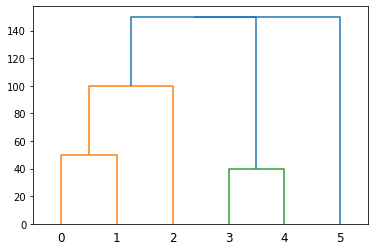

In [115]:
G = np.array([[0.0,1.0,50.0,2.0],[3.0,4.0,40.0,1.0],[6.0,2.0,100.0,3.0],[8.0,7.0,150.0,4.0],[9.0,5.0,150.0,5.0]])
hierarchy.dendrogram(G)
hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(G,distances_3))

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [22.5, 22.5, 50.0, 50.0],
  [5.0, 5.0, 36.25, 36.25]],
 'dcoord': [[0.0, 50.0, 50.0, 0.0],
  [0.0, 100.0, 100.0, 50.0],
  [0.0, 150.0, 150.0, 0.0],
  [100.0, 200.0, 200.0, 150.0],
  [0.0, 250.0, 250.0, 200.0]],
 'ivl': ['5', '2', '1', '0', '4', '3'],
 'leaves': [5, 2, 1, 0, 4, 3],
 'color_list': ['C1', 'C1', 'C2', 'C0', 'C0']}

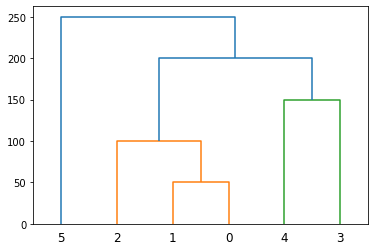

In [112]:
hierarchy.dendrogram(Z)

In [113]:
hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z,distances_3))

array([5, 3, 4, 2, 0, 1], dtype=int32)

### TO-DO  11.02.2021
1. Sort linkage matrix with respect to current leaf ordering and divide it into two subtrees


In [116]:
Z

array([[  1.,   0.,  50.,   1.],
       [  2.,   6., 100.,   2.],
       [  4.,   3., 150.,   3.],
       [  7.,   8., 200.,   4.],
       [  5.,   9., 250.,   5.]])

In [128]:
n_points = Z.shape[0] + 1
n_clusters = 2*n_points - 1

In [133]:
# Current leaves linear ordering
sorted_leaves = hierarchy.leaves_list(Z)

array([5, 2, 1, 0, 4, 3], dtype=int32)

In [134]:
 # Create map from original order to sorted order.
original_order_to_sorted_order = dict((orig_i, sorted_i) for sorted_i,orig_i
                                          in enumerate(sorted_leaves))

In [135]:
original_order_to_sorted_order

{5: 0, 2: 1, 1: 2, 0: 3, 4: 4, 3: 5}

In [142]:
sorted_Z = []
sorted_D = distances_3
for (v_l, v_r, _, v_size) in Z:
    if v_l < n_points:
        v_l = original_order_to_sorted_order[int(v_l)]
    if v_r < n_points:
        v_r = original_order_to_sorted_order[int(v_r)]

    sorted_Z.append([v_l, v_r, v_size])
sorted_Z = np.array(sorted_Z).astype(np.int32).copy(order='C')

In [140]:
sorted_D = sorted_D[sorted_leaves, :]
sorted_D = sorted_D[:, sorted_leaves].copy(order='C')
sorted_D

array([[ 0, 10,  7,  9,  5,  7],
       [10,  0,  7, 11,  9,  5],
       [ 7,  7,  0,  8,  6,  4],
       [ 9, 11,  8,  0,  8,  8],
       [ 5,  9,  6,  8,  0,  6],
       [ 7,  5,  4,  8,  6,  0]])

In [144]:
sorted_Z

array([[2, 3, 1],
       [1, 6, 2],
       [4, 5, 3],
       [7, 8, 4],
       [0, 9, 5]], dtype=int32)

In [143]:
 for i in range(len(sorted_Z)):
    v_l = sorted_Z[i,0]
    v_r = sorted_Z[i,1]
    print(i,v_l,v_r)

0 2 3
1 1 6
2 4 5
3 7 8
4 0 9


In [151]:
cluster_ranges = np.zeros((n_clusters, 2))
cluster_ranges[np.arange(n_points), 0] = np.arange(n_points)
cluster_ranges[np.arange(n_points), 1] = np.arange(n_points) + 1
for link_i, (v_l, v_r, v_size) in enumerate(sorted_Z):
    print(link_i,v_l,v_r)
    v = link_i + n_points
    cluster_ranges[v, 0] = cluster_ranges[v_l, 0]
    cluster_ranges[v, 1] = cluster_ranges[v_r, 1]
cluster_ranges = cluster_ranges.astype(np.int32).copy(order='C')

0 2 3
1 1 6
2 4 5
3 7 8
4 0 9


In [147]:
cluster_ranges

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [2, 4],
       [1, 4],
       [4, 6],
       [1, 6],
       [0, 6]], dtype=int32)

### TODO
1. Visualize tree based on linkage matrix